# Tải dữ liệu và unzip. Chuẩn bị dữ liệu.

In [0]:
%%capture
!wget -O /usr/sbin/gdrivedl 'https://f.mjh.nz/gdrivedl'
!chmod +x /usr/sbin/gdrivedl

In [0]:
%%capture
!gdrivedl https://drive.google.com/uc?id=1Lhrr32XvSNbwCfnnqZvcbWFml_O3N8ho&export=download
!gdrivedl https://drive.google.com/uc?id=1M2HJjKohl4JYCCkTTcLi2bjDPrlyNmyi&export=download
!gdrivedl https://drive.google.com/uc?id=14CxMv6bvNdKQ-xGbx2Z91sunu5hBwMNH&export=download

In [0]:
%%capture
!unzip resultimgs.zip
!unzip jsoninfos.zip

Kiểm tra lại nếu in ra 2 dòng 3368 là đủ số lượng

In [0]:
!ls -1 jsoninfos | wc -l
!ls -1 resultimgs | wc -l

3368
3368


In [0]:
%%capture
!wget http://188.138.127.15:81/Datasets/Market-1501-v15.09.15.zip
!unzip Market-1501-v15.09.15.zip
!mv Market-1501-v15.09.15/ Market/
!pip install pretrainedmodels


In [0]:
%%capture
!rm -rf /content/Person_reID_baseline_pytorch
!cd /content/ && git clone https://github.com/phamtrongthang123/Person_reID_baseline_pytorch

In [0]:
%%capture
%cd /content/Person_reID_baseline_pytorch
!python prepare.py

# Thống kê những query nào có sai, đứa nào sai nhiều nhất trên 10 ảnh predict
Json folder lưu các thông tin đường dẫn của kết quả lần lượt tương ứng với mỗi ảnh ở resultimgs


In [0]:
%cd  /content/jsoninfos

/content/jsoninfos


In [0]:
def getlabel(query_path):
  label = query_path.split('/')[4]
  return label

In [0]:
import json
his = {}
for i in range(3368):
  with open('data%d.json'%i) as data:
    dic = json.load(data)
    query_path = list(dic.keys())[0]
    query_label = getlabel(query_path)
    if (query_label not in his):
      his[query_label] = 0
    for path, iscor in dic[query_path][1:]:
      # đếm nếu sai
      if (iscor == 0):
        his[query_label] += 1

<BarContainer object of 750 artists>

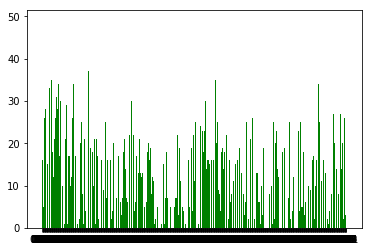

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(list(his.keys()), his.values(), color='g')

In [0]:
import operator
sorted_his = sorted(his.items(), key=operator.itemgetter(1))

In [0]:
sorted_his

[('0015', 0),
 ('0041', 0),
 ('0049', 0),
 ('0051', 0),
 ('0112', 0),
 ('0210', 0),
 ('0215', 0),
 ('0220', 0),
 ('0227', 0),
 ('0228', 0),
 ('0256', 0),
 ('0267', 0),
 ('0285', 0),
 ('0289', 0),
 ('0290', 0),
 ('0329', 0),
 ('0330', 0),
 ('0336', 0),
 ('0345', 0),
 ('0363', 0),
 ('0387', 0),
 ('0388', 0),
 ('0469', 0),
 ('0493', 0),
 ('0520', 0),
 ('0521', 0),
 ('0535', 0),
 ('0541', 0),
 ('0550', 0),
 ('0583', 0),
 ('0602', 0),
 ('0610', 0),
 ('0621', 0),
 ('0625', 0),
 ('0650', 0),
 ('0664', 0),
 ('0686', 0),
 ('0687', 0),
 ('0690', 0),
 ('0691', 0),
 ('0692', 0),
 ('0710', 0),
 ('0715', 0),
 ('0721', 0),
 ('0731', 0),
 ('0751', 0),
 ('0763', 0),
 ('0776', 0),
 ('0790', 0),
 ('0804', 0),
 ('0811', 0),
 ('0817', 0),
 ('0825', 0),
 ('0829', 0),
 ('0923', 0),
 ('0950', 0),
 ('0968', 0),
 ('0993', 0),
 ('0996', 0),
 ('1009', 0),
 ('1020', 0),
 ('1021', 0),
 ('1029', 0),
 ('1057', 0),
 ('1064', 0),
 ('1070', 0),
 ('1092', 0),
 ('1119', 0),
 ('1128', 0),
 ('1147', 0),
 ('1149', 0),
 ('115

In [0]:
with open('data388.json') as f:
  dic = json.load(f)
  print(dic)

{'../Market/pytorch/query/0182/0182_c2s1_033676_00.jpg': [['id', 388], ['../Market/pytorch/gallery/0060/0060_c4s1_007801_02.jpg', 0], ['../Market/pytorch/gallery/0060/0060_c1s1_008526_01.jpg', 0], ['../Market/pytorch/gallery/0182/0182_c4s1_034626_03.jpg', 1], ['../Market/pytorch/gallery/0060/0060_c1s1_008501_01.jpg', 0], ['../Market/pytorch/gallery/0182/0182_c3s1_033626_02.jpg', 1], ['../Market/pytorch/gallery/0060/0060_c2s1_008051_02.jpg', 0], ['../Market/pytorch/gallery/0182/0182_c5s1_034751_02.jpg', 1], ['../Market/pytorch/gallery/0060/0060_c2s1_008001_02.jpg', 0], ['../Market/pytorch/gallery/0182/0182_c4s1_034701_01.jpg', 1], ['../Market/pytorch/gallery/0060/0060_c3s1_007726_01.jpg', 0]]}


2 id trùng lắp: 0060 và 0182

In [0]:
with open('data2290.json') as f:
  dic = json.load(f)
  print(dic)

{'../Market/pytorch/query/1073/1073_c2s2_140527_00.jpg': [['id', 2290], ['../Market/pytorch/gallery/0091/0091_c3s1_013776_03.jpg', 0], ['../Market/pytorch/gallery/1073/1073_c4s5_006804_02.jpg', 1], ['../Market/pytorch/gallery/1073/1073_c5s2_143474_04.jpg', 1], ['../Market/pytorch/gallery/0091/0091_c5s1_014026_01.jpg', 0], ['../Market/pytorch/gallery/1073/1073_c4s5_006904_04.jpg', 1], ['../Market/pytorch/gallery/1073/1073_c3s2_143244_04.jpg', 1], ['../Market/pytorch/gallery/0091/0091_c3s1_013976_05.jpg', 0], ['../Market/pytorch/gallery/0091/0091_c3s1_021626_03.jpg', 0], ['../Market/pytorch/gallery/0091/0091_c5s1_021826_02.jpg', 0], ['../Market/pytorch/gallery/0091/0091_c6s1_014426_02.jpg', 0]]}


2 id trùng lắp 0091 1073

In [0]:
with open('data2120.json') as f:
  dic = json.load(f)
  print(dic)

{'../Market/pytorch/query/1013/1013_c2s2_127902_00.jpg': [['id', 2120], ['../Market/pytorch/gallery/1199/1199_c2s3_016382_02.jpg', 0], ['../Market/pytorch/gallery/1199/1199_c4s5_037985_07.jpg', 0], ['../Market/pytorch/gallery/1013/1013_c5s2_130949_07.jpg', 1], ['../Market/pytorch/gallery/1199/1199_c5s3_022640_03.jpg', 0], ['../Market/pytorch/gallery/1199/1199_c3s3_022203_06.jpg', 0], ['../Market/pytorch/gallery/1199/1199_c3s3_022178_04.jpg', 0], ['../Market/pytorch/gallery/1013/1013_c3s2_130569_04.jpg', 1], ['../Market/pytorch/gallery/1013/1013_c5s2_130999_04.jpg', 1], ['../Market/pytorch/gallery/1199/1199_c4s5_037885_02.jpg', 0], ['../Market/pytorch/gallery/1199/1199_c4s5_037960_02.jpg', 0]]}


2 id có khả năng trùng lặp 1013 1199

In [0]:
for a,b in sorted_his:
  if (a=='1199'):
    print(b)

12


In [0]:
!ls -1 /content/Market/pytorch/gallery/1013 |wc -l
!ls -1 /content/Market/pytorch/gallery/1199 |wc -l

10
30


In [0]:
!ls -1 /content/Market/pytorch/gallery/0091 |wc -l
!ls -1 /content/Market/pytorch/gallery/1073 |wc -l

40
12


In [0]:
!ls -1 /content/Market/pytorch/gallery/0060 |wc -l
!ls -1 /content/Market/pytorch/gallery/0182 |wc -l

26
21


In [0]:
import os, os.path
for a,b in sorted_his:
  print(a,b,len(os.listdir('/content/Market/pytorch/gallery/%s'%a)))

0015 0 29
0041 0 20
0049 0 27
0051 0 34
0112 0 27
0210 0 27
0215 0 33
0220 0 44
0227 0 58
0228 0 59
0256 0 27
0267 0 28
0285 0 17
0289 0 16
0290 0 23
0329 0 23
0330 0 19
0336 0 24
0345 0 25
0363 0 20
0387 0 37
0388 0 38
0469 0 17
0493 0 16
0520 0 25
0521 0 48
0535 0 14
0541 0 25
0550 0 20
0583 0 27
0602 0 17
0610 0 33
0621 0 20
0625 0 27
0650 0 23
0664 0 15
0686 0 29
0687 0 34
0690 0 23
0691 0 32
0692 0 40
0710 0 48
0715 0 33
0721 0 38
0731 0 46
0751 0 21
0763 0 38
0776 0 26
0790 0 18
0804 0 18
0811 0 22
0817 0 25
0825 0 22
0829 0 22
0923 0 21
0950 0 18
0968 0 19
0993 0 16
0996 0 25
1009 0 16
1020 0 17
1021 0 18
1029 0 18
1057 0 25
1064 0 28
1070 0 30
1092 0 16
1119 0 20
1128 0 14
1147 0 20
1149 0 24
1155 0 21
1163 0 21
1182 0 22
1186 0 16
1187 0 18
1203 0 24
1208 0 16
1212 0 38
1225 0 26
1226 0 19
1229 0 33
1236 0 19
1239 0 16
1248 0 19
1255 0 14
1256 0 22
1262 0 15
1272 0 19
1273 0 29
1280 0 27
1285 0 18
1317 0 37
1319 0 27
1322 0 21
1324 0 18
1351 0 20
1356 0 27
1362 0 28
1370 0 18


In [0]:
import os, os.path
iden = []
num_imgs = []
for a,b in sorted_his:
  iden.append(a)
  num_imgs.append(len(os.listdir('/content/Market/pytorch/gallery/%s'%a)))
                  
               

<BarContainer object of 750 artists>

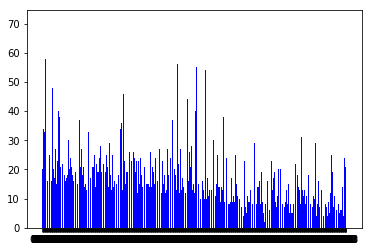

In [0]:

plt.bar(iden,num_imgs, color='b')

**=> Dễ thấy có nhiều thư mục khác nhau nên đo như vậy chưa chính xác. Thay vào đó tính AP cho mỗi query sẽ tốt hơn**

# Thống kê attribute của dataset

In [0]:
!cd /content/ && git clone https://github.com/phamtrongthang123/Market-1501_Attribute

Cloning into 'Market-1501_Attribute'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 106 (delta 0), reused 1 (delta 0), pack-reused 103
Receiving objects: 100% (106/106), 137.31 KiB | 388.00 KiB/s, done.
Resolving deltas: 100% (42/42), done.


In [0]:
%cd /content/Market-1501_Attribute/

/content/Market-1501_Attribute


## Tạo ra matrix các giá trị của 27 thuộc tính của tập train và test sao cho truy xuất ngẫu nhiên được
Cú pháp 

***train/test***data_dic['***tên att***'][ ***train/test***headline_dic[' ***ID muốn tra***'] ] 

In [0]:
import numpy as np
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd

mat = loadmat('market_attribute.mat')  # load mat-file
mdata = mat['market_attribute']  # variable in mat file
mdtype = mdata.dtype  # dtypes of structures are "unsized objects"
ndata = {n: mdata[n][0, 0] for n in mdtype.names}


In [0]:
# ndata['test'][0][0][27][0] là ra id tương ứng
# tạo dict cho dễ truy xuất
testheadline = [x[0] for x in ndata['test'][0][0][27][0]]
testheadline_dic = {testheadline[i] : i for i in range(750)}
testheadline_dic

{'0001': 0,
 '0003': 1,
 '0004': 2,
 '0005': 3,
 '0006': 4,
 '0008': 5,
 '0009': 6,
 '0013': 7,
 '0014': 8,
 '0015': 9,
 '0016': 10,
 '0017': 11,
 '0018': 12,
 '0019': 13,
 '0021': 14,
 '0024': 15,
 '0025': 16,
 '0026': 17,
 '0029': 18,
 '0031': 19,
 '0033': 20,
 '0034': 21,
 '0036': 22,
 '0038': 23,
 '0039': 24,
 '0040': 25,
 '0041': 26,
 '0044': 27,
 '0045': 28,
 '0049': 29,
 '0050': 30,
 '0051': 31,
 '0054': 32,
 '0055': 33,
 '0058': 34,
 '0060': 35,
 '0061': 36,
 '0062': 37,
 '0063': 38,
 '0066': 39,
 '0071': 40,
 '0072': 41,
 '0073': 42,
 '0074': 43,
 '0075': 44,
 '0078': 45,
 '0080': 46,
 '0083': 47,
 '0085': 48,
 '0087': 49,
 '0089': 50,
 '0091': 51,
 '0092': 52,
 '0094': 53,
 '0096': 54,
 '0101': 55,
 '0102': 56,
 '0103': 57,
 '0109': 58,
 '0112': 59,
 '0113': 60,
 '0119': 61,
 '0120': 62,
 '0124': 63,
 '0126': 64,
 '0128': 65,
 '0130': 66,
 '0131': 67,
 '0133': 68,
 '0137': 69,
 '0138': 70,
 '0144': 71,
 '0145': 72,
 '0146': 73,
 '0147': 74,
 '0152': 75,
 '0153': 76,
 '0154': 

In [0]:
trainheadline =  [x[0] for x in ndata['train'][0][0][27][0]]
trainheadline_dic = {trainheadline[i] : i for i in range(751)}
trainheadline_dic

{'0002': 0,
 '0007': 1,
 '0010': 2,
 '0011': 3,
 '0012': 4,
 '0020': 5,
 '0022': 6,
 '0023': 7,
 '0027': 8,
 '0028': 9,
 '0030': 10,
 '0032': 11,
 '0035': 12,
 '0037': 13,
 '0042': 14,
 '0043': 15,
 '0046': 16,
 '0047': 17,
 '0048': 18,
 '0052': 19,
 '0053': 20,
 '0056': 21,
 '0057': 22,
 '0059': 23,
 '0064': 24,
 '0065': 25,
 '0067': 26,
 '0068': 27,
 '0069': 28,
 '0070': 29,
 '0076': 30,
 '0077': 31,
 '0079': 32,
 '0081': 33,
 '0082': 34,
 '0084': 35,
 '0086': 36,
 '0088': 37,
 '0090': 38,
 '0093': 39,
 '0095': 40,
 '0097': 41,
 '0098': 42,
 '0099': 43,
 '0100': 44,
 '0104': 45,
 '0105': 46,
 '0106': 47,
 '0107': 48,
 '0108': 49,
 '0110': 50,
 '0111': 51,
 '0114': 52,
 '0115': 53,
 '0116': 54,
 '0117': 55,
 '0118': 56,
 '0121': 57,
 '0122': 58,
 '0123': 59,
 '0125': 60,
 '0127': 61,
 '0129': 62,
 '0132': 63,
 '0134': 64,
 '0135': 65,
 '0136': 66,
 '0139': 67,
 '0140': 68,
 '0141': 69,
 '0142': 70,
 '0143': 71,
 '0148': 72,
 '0149': 73,
 '0150': 74,
 '0151': 75,
 '0158': 76,
 '0159': 

In [0]:
rowname_test = list(ndata['test'][0][0].dtype.names)
rowname_test = rowname_test[0:-1]
rowname_test

['age',
 'backpack',
 'bag',
 'handbag',
 'clothes',
 'down',
 'up',
 'hair',
 'hat',
 'gender',
 'upblack',
 'upwhite',
 'upred',
 'uppurple',
 'upyellow',
 'upgray',
 'upblue',
 'upgreen',
 'downblack',
 'downwhite',
 'downpink',
 'downpurple',
 'downyellow',
 'downgray',
 'downblue',
 'downgreen',
 'downbrown']

In [0]:
testdata =  [x.tolist() for x in ndata['test'][0][0]]
testdata = testdata[0:-1]

In [0]:
# kiểm tra thấy chạy này ra ngay dòng age testdata[1][0]
# tạo dic
testdata_dic = {rowname_test[i]: testdata[i][0] for i in range(27)}
testdata_dic

{'age': [2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  4,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  3,
  3,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  3,
  2,
  2,
  3,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2

In [0]:
testdata_dic['age'][549]
# ok!

2

In [0]:
rowname_train = list(ndata['train'][0][0].dtype.names)
rowname_train = rowname_train[0:-1]
traindata =  [x.tolist() for x in ndata['train'][0][0]]
traindata = traindata[0:-1]
traindata_dic = {rowname_train[i] : traindata[i][0] for i in range(27)}
traindata_dic

{'age': [2,
  2,
  2,
  2,
  3,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  4,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  4,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  2,
  2,
  3,
  2,
  2,
  3,
  2,
  2,
  2,
  3,
  3,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  1,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  4,
  2,
  2,
  3,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  4,
  3,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2

In [0]:
traindata_dic['upblack'][trainheadline_dic['0020']]

2

## Thống kê att ở tập train, đưa ra bar chart 

## Thống kê từ giá trị AP, từ những ngưỡng AP đưa ra thống kê att cho trường hợp không thỏa